<a href="https://colab.research.google.com/github/Rhunys/Projet_LAS/blob/main/BIN3100_Projet_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Théorie

##Vidéos obligatoires
Nous vous demandons de regarder et de comprendre les vidéos suivante:

1.   [Projet COVID-19 : EXPLORATION DES DONNÉES](https://www.youtube.com/watch?v=u64sWJEP4S0&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=31)
2.   [Projet COVID-19 : PRE-PROCESSING](https://www.youtube.com/watch?v=x8yu8sq8mdw&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=32)
3.   [Projet COVID-19 : MODÉLISATION ](https://www.youtube.com/watch?v=r58meM7ieaQ&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=33)

## Les vidéos suivantes sont en bonus:

4.  [PROJET COVID-19 : MÉTHODOLOGIE DE TRAVAIL](https://www.youtube.com/watch?v=1bJYEE9qgS4&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=30)
5.  [SK-LEARN : ENSEMBLE LEARNING](https://www.youtube.com/watch?v=7C_YpudYtw8&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=29)


# Partie 1: Vidéos Machine Learnia

https://www.youtube.com/playlist?list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq

## Vidéos (27 à 29 /30) :
[Projet COVID-19 : EXPLORATION DES DONNÉES](https://www.youtube.com/watch?v=u64sWJEP4S0&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=31) <strong> (Déjà vue en Semaine 04 !) </strong>

[Projet COVID-19 : PRE-PROCESSING](https://www.youtube.com/watch?v=x8yu8sq8mdw&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=32)

[Projet COVID-19 : MODÉLISATION ](https://www.youtube.com/watch?v=r58meM7ieaQ&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=33)


Dans ces trois vidéos, vous allez suivre le développement complet d'un projet depuis l'analyse des données jusqu'à la création du modèle ainsi que son entrainement et son évaluation.

Ce projet est celui de la détection des patients ayant le COVID-19.

**Remarques :**

1. Les vidéos sont assez longues (60, 45 et 37 minutes respectivement).  On ne vous demande pas de reproduire ce projet. Celui-ci est là pour vous donner un exemple des différentes étapes d'un projet et vous aider dans le projet que vous allez faire cette semaine. Les deux heures du lundi seront consacré à ce nouveau projet.
2. La méthodologie utilisée pour la résolution de ce projet est expliquée plus en détails dans la première vidéo bonus : [PROJET COVID-19 : MÉTHODOLOGIE DE TRAVAIL ](https://www.youtube.com/watch?v=1bJYEE9qgS4&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=30)
3. Pour la partie modélisation, des techniques dites d'Ensemble Learning sont utilisées. Si vous voulez en savoir plus sur ces techniques, vous pouvez regarder la seconde vidéo bonus : [SK-LEARN : ENSEMBLE LEARNING ](https://www.youtube.com/watch?v=7C_YpudYtw8&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=29)
4. Si cela vous intéresse, le fichier de données pour ce projet se trouve sur moodle et s'apppelle [COVID-19.xlsx](https://moodle.vinci.be/mod/resource/view.php?id=192010)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('Customer_Segmentation.xlsx')

In [5]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,460108,Male,Yes,42,Yes,Artist,1.0,Average,3.0,Cat_2,C
1,459869,Female,No,23,No,Healthcare,1.0,Low,3.0,Cat_6,D
2,460192,Male,Yes,41,Yes,NaN,0.0,Low,2.0,Cat_7,D
3,463582,Female,No,18,No,Healthcare,1.0,Low,3.0,Cat_6,D
4,467114,Male,Yes,59,Yes,Marketing,0.0,Average,3.0,Cat_6,B


In [9]:
df = data.copy()

In [10]:
df.shape

(7068, 11)

In [12]:
df.dtypes.value_counts()

,count
object,7
int64,2
float64,2


Lignes blanches = valeurs manquantes

<Axes: >

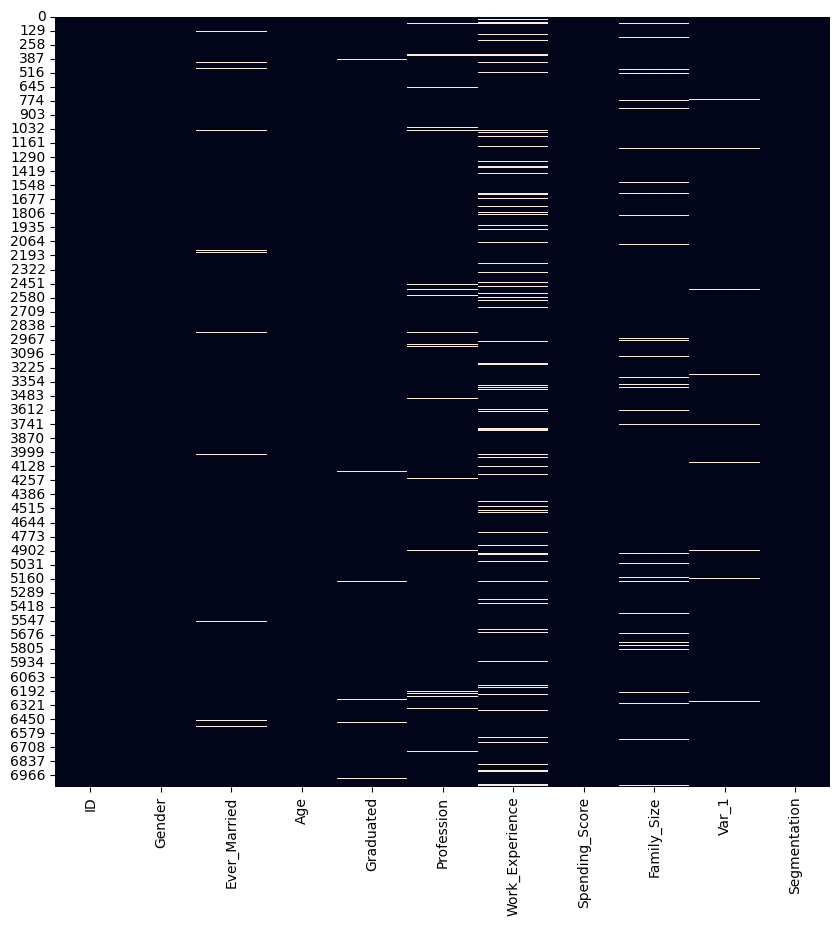

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna(), cbar=False)

# Partie 2 : Projet "Customer Segmentation Classification"

Une entreprise automobile envisage de pénétrer de nouveaux marchés avec ses produits existants (P1, P2, P3, P4 et P5). Après une étude de marché intensive, elle en a déduit que le comportement du nouveau marché est similaire à celui de son marché existant.

Sur le marché existant, l'équipe de vente a classé tous les clients en quatre segments (A, B, C, D). Elle a ensuite mené des actions de sensibilisation et de communication segmentées pour chaque segment de clients. Cette stratégie a exceptionnellement bien fonctionné. Elle prévoit d'utiliser la même stratégie pour les nouveaux marchés et a identifié 1000 nouveaux clients potentiels.

Il vous est demandé d'aider le directeur à prévoir le bon groupe de nouveaux clients.

Ces données se trouve dans le fichier [Customer_Segmentation.csv](https://moodle.vinci.be/mod/resource/view.php?id=191997) se trouvant sur moodle

Nous vous demandons de fournir un modèle permettant de faire des prédictions <strong> sur le segment dans lequel classer chaque nouveau client. </strong>

Pour faire, vous allez suivre la méthodologie présentée dans les vidéos :



<ol type="I">
<li> <h2><b>Exploratory Data Analysis</b> </h2>
<b>Objectif :</b> comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation.: </li>
<ol>
<li>  Analyse de la forme :</li>
<ol type="a">
<li> Identification de la target : Segmentation</li>
<li>Nombre des lignes et de colonnes : 7068, 11</li>
<li>Identification des valeurs manquantes </li>
<li>Types de variables : 2 qualitatives, 9 quantitatives</li>
</ol>
<li>Analyse du fond :</li>
<ol type="a">
<li>Visualisation de la target (histogramme/boxplot) </li>
<li>Compréhension des différentes variables (recherche)</li>
<li>Visualisation des relations : features/target</li>
<li>Identification des outliers</li>
</ol>
</ol>

<li><h2><b>Pre-processing</b></h2>

<b> Objectif :</b> transformer le data pour le mettre dans un format propice au machine learning </li>
<ol>
<li>Création du Train Set / Test Set </li>
<li>Élimination des NaN : dropna(), imputation, colonne"vides"</li>
<li>Encodage</li>
<li>Suppression des outliers néfastes au modèle</li>
<li>Feature selection</li>
<li>Feature engineering</li>
<li>Feature scaling</li>
</ol>

<li><h2><b>Modelling</b></h2>
<b>Objectif:</b> développer un modèle de machine learning capable de répondre a l'objectif final.</li>
<ol>
<li>Définir une fonction d'évaluation</li>
<li>Entrainement de différents modèles</li>
<li>Optimisation avec GridSearchCV</li>
<li>Analyse des erreurs et retour au Preprocessing / EDA <br>
           Learning Curve et prise de décision</li>
</ol>
</ol>




# **I. EXPLORATORY DATA ANALYSIS**

## 1) Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation

## 2) Analyse de Forme :
- **variable target** : [ Votre réponse ici ]
- **lignes et colonnes** : [ Votre réponse ici ]
- **types de variables** : [ Votre réponse ici ]
- **Analyse des valeurs manquantes** :

    [ Votre réponse ici ]

In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3) Analyse de Fond :
- **Visualisation de la target** :
    
    [ Votre réponse ici ]
    
    
- **Signification des variables** :
    
    [ Votre réponse ici ]

- **Relation Variables / Target** :

    [ Votre réponse ici ]

- **Choix de la métrique** : Etant donné le problème quelle mesure serait la plus appropriée et pourquoi?

    [ Votre réponse ici ]

- **Outliers et/ou autre analyse** :

    [ Votre réponse ici ]

In [ ]:
#Votre code pour l'analyse de Fond

## **II) PRE-PROCESSING :**

##Objectif :  
- Transformer le data pour le mettre dans un format propice au machine learning

##Explications de vos choix :
[ Vos explications ici ]

In [ ]:
#Code pour votre pre-processing

##**III) MODELLING**

##Objectif :  
- Développer un modèle de machine learning capable de répondre a l'objectif final.

##Explications de vos choix :
[ Vos explications ici ]

In [ ]:
#Code votre modelling

##**IV) Tests du modèle**##

Pour tester, votre modèle nous vous demandons de prédire les décisions pour les clients du fichier Customer_Segmentation et <strong> d'afficher le score de vos prédictions (l'accuracy, la précision ou le recall selon ce que vous avez choisi).</strong>


Le fichier [Customer_Segmentation_test.csv](https://moodle.vinci.be/mod/resource/view.php?id=192001) contient les données des 1000 clients pour lesquels vous devez prédire le groupe.
Pour ce faire, on vous demande de soumettre un fichier csv contenant les prédictions dans le même ordre que les clients du fichier Custom_Segmentation_test.csv. Ce fichier devra avoir la forme du fichier [Customer_Segmentation_predicition_submission.csv](https://moodle.vinci.be/mod/resource/view.php?id=192007) se trouvant aussi sur moodle.





In [ ]:
#Code pour vos tests et vos résultats